In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#Import data
info_csv = pd.read_csv('../test_data/ready_for_training.csv')

In [3]:
target = info_csv['type']
info_csv = info_csv.drop('type', axis=1)

In [4]:
info_csv.head()

,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,...,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length,tld,tld_length
0,0,0,1,2,0,0,0,0,0,0,...,1,0,16,0,0,0,13,0,-1,-1
1,0,0,1,2,0,0,2,0,0,0,...,0,0,35,0,0,1,29,5,-1,-1
2,0,0,1,2,0,0,3,0,0,0,...,0,0,31,0,0,1,25,7,-1,-1
3,0,1,1,3,1,0,1,0,0,0,...,1,4,88,21,0,7,63,9,0,2
4,0,1,1,2,0,0,1,0,0,0,...,1,3,235,23,0,22,199,9,1,3


In [5]:
X_train, X_test, y_train, y_test = train_test_split(info_csv, target, test_size=0.30)

In [6]:
pca = PCA(n_components=None)
pca.fit(X_train)

PCA()

In [7]:
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)
print(len(exp_var))

23


<BarContainer object of 23 artists>

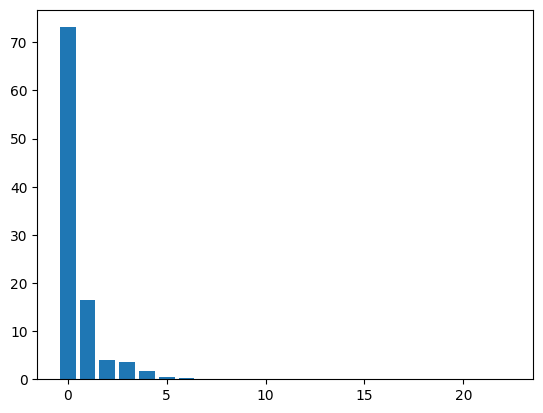

In [8]:
plt.bar(range(len(exp_var)), exp_var, align='center',
        label='Individual explained variance')

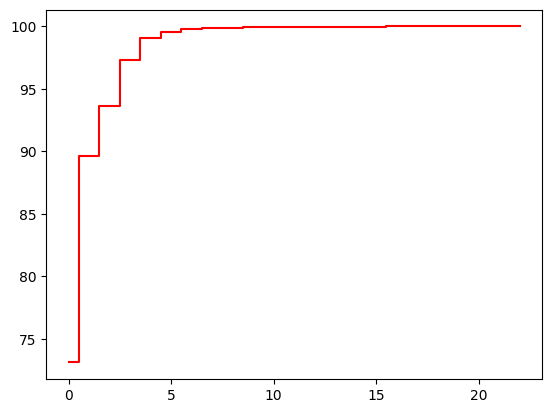

In [9]:
plt.step(range(len(cum_exp_var)), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

In [10]:
# Create an instance of the PCA class
pca2 = PCA(n_components=2)

In [11]:
# Fit the PCA model to your data
pca2.fit(X_train)

PCA(n_components=2)

In [12]:
# Transform the data to the first two principal components
X_train_pca2 = pca2.transform(X_train)

In [13]:
# Plot the transformed data
#sns.scatterplot(X_train_pca2[:, 0], X_train_pca2[:, 1], palette=['green', 'blue'])
#plt.show()

In [14]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train_pca2, y_train)

RandomForestClassifier(n_estimators=500)

In [15]:
X_test_pca2 = pca2.transform(X_test)

In [16]:
output_predictions = rfc.predict(X_test_pca2)

In [17]:
print(confusion_matrix(y_test,output_predictions))

[[ 17561   6633   2896    169]
 [  2356 122436    983     67]
 [   970    951  27227    150]
 [   365    186    367   8742]]


In [18]:
print(classification_report(y_test,output_predictions))

              precision    recall  f1-score   support

           0       0.83      0.64      0.72     27259
           1       0.94      0.97      0.96    125842
           2       0.87      0.93      0.90     29298
           3       0.96      0.90      0.93      9660

    accuracy                           0.92    192059
   macro avg       0.90      0.86      0.88    192059
weighted avg       0.91      0.92      0.91    192059

